Import Pakages

In [1]:
import numpy,math
from PIL import Image,ImageDraw
from matplotlib import pyplot as plt

Some Utilities

In [19]:
def read_img(img_path:str)->Image.Image:
    img = Image.open(img_path)
    return img

def parse_img(img:Image.Image,window_size:int,d:int)->list[Image.Image]:
    M,N = img.size[0],img.size[1]
    img_list = split_img(img,window_size)
    new_img_list = []
    for image in img_list:
        colors = Image.Image.getcolors(image,12675)
        colors.sort(reverse=True)
        colors = colors[0:24]
        mean_color = sum(i*numpy.array(j) for i,j in colors)
        new_img_list.append(img_filter(image,(mean_color/sum(i for i,j in colors)).astype(int),d))        
    return img_list,new_img_list
 
def split_img(img:Image.Image,window_size:int=25)->list[Image.Image]:
    N,M = img.size[0],img.size[1]
    img_list = []
    for i in range(0,int(N/window_size)):
        img_list.append(img.crop([i*window_size,0,(i+1)*window_size,M-1]))
    return img_list

def img_filter(img:Image.Image,threshold:tuple,d:int)->Image.Image:
    img = img.convert('RGB')
    G = (0,255,255)
    new_imdata = []
    for color in img.getdata():
        if RGB_diff(color,threshold) > d:
            new_imdata.append(G)
        else:
            new_imdata.append(color)
    new_image = Image.new(mode=img.mode,size=img.size)
    new_image.putdata(new_imdata)

    draw = ImageDraw.Draw(new_image)
    draw.rectangle(((0,0),new_image.size),outline='#00ffff')
    return new_image

def RGB_diff(color:tuple,threshold:tuple)->float:
    delta_R = color[0]-threshold[0]
    delta_G = color[1]-threshold[1]
    delta_B = color[2]-threshold[2]
    R_mean = (color[0]+threshold[0])/2
    if R_mean<128:
        return math.sqrt(2*delta_R**2+4*delta_G**2+3*delta_B**2)
    else:
        return math.sqrt(3*delta_R**2+4*delta_G**2+2*delta_B**2)
    
def plot_image(img_list,new_img_list,mean_color,window_size):
    im1 = get_concat_h(img_list)
    im2 = get_concat_h(new_img_list)
    color_tone = []
    for c in mean_color:
        rec = Image.new('RGB',size=(window_size,window_size))
        imageDraw = ImageDraw.Draw(rec)
        imageDraw.rectangle([0,0,window_size,window_size],fill=rgb2hex(c),outline='white',width=1)
        imageDraw.text((window_size/5,window_size/3),rgb2hex(c))
        color_tone.append(rec)
    im3 = get_concat_h(color_tone)

    fig = plt.figure(figsize=(10,5))
    fig.add_subplot(3,1,1)
    plt.imshow(im1)
    plt.axis('off')
    plt.title('origin')
    fig.add_subplot(3,1,2)
    plt.imshow(im2)
    plt.axis('off')
    plt.title('filtered')
    fig.add_subplot(3,1,3)
    plt.imshow(im3)
    plt.axis('off')
    plt.title('color')

def get_concat_h(imgs:list[Image.Image]):
    new_width = sum(im.size[0] for im in imgs)
    new_img = Image.new(mode=imgs[0].mode,size=(new_width,imgs[0].height))
    w = 0
    for i in range(len(imgs)):
        new_img.paste(imgs[i],(w,0))
        w += imgs[i].size[0]
    return new_img

def rgb2hex(color):
    return '#{:02x}{:02x}{:02x}'.format(color[0],color[1],color[2])

def getMeanColor(new_img_list):
    mean_color = []
    for img in new_img_list:
        data =[]
        for c in img.getdata():
            if c!=(0,255,255):
                data.append(c)
        mean_color.append(numpy.mean(data,axis=0).astype('int'))
    return mean_color

Some Conifgs

In [17]:
img_path = "./image02.jpg"
window_size = 90
distance = 45

Main

In [20]:
img = read_img(img_path)
img_list,new_img_list = parse_img(img,window_size,distance)
mean_color = getMeanColor(new_img_list)

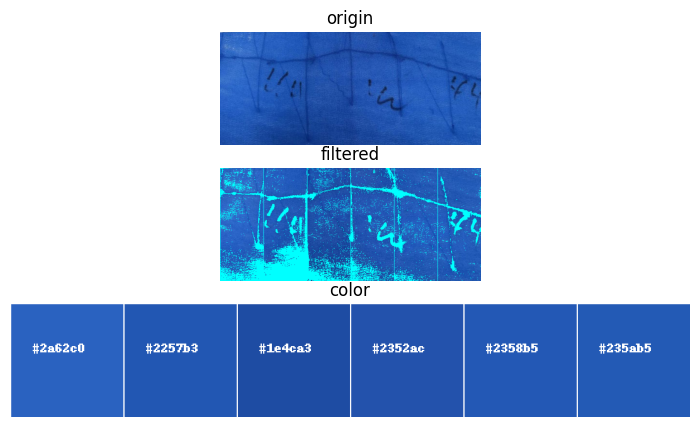

In [21]:
plot_image(img_list,new_img_list,mean_color,window_size)